In [2]:
import numpy as np
import pandas as pd
import pylab
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind

In [3]:
Q1=pd.read_csv('Wholesale+Customers+Data.csv')

1.1. Use methods of descriptive statistics to summarize data.
Which Region and which Channel seems to spend more?
Which Region and which Channel seems to spend less?

In [52]:
Dataframe=Q1.groupby(['Channel','Region'])['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen'].sum()
Dataframe.sum(axis=1)

Channel  Region
Hotel    Lisbon    1538342
         Oporto     719150
         Other     5742077
Retail   Lisbon     848471
         Oporto     835938
         Other     4935522
dtype: int64

In [65]:
Q1.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [50]:
Q1.groupby(['Channel','Region'])['Fresh'].describe()

count          mean           std    min      25%     50%  \
Channel Region                                                              
Hotel   Lisbon   59.0  12902.254237  12342.008901  514.0  4437.50  8656.0   
        Oporto   28.0  11650.535714   8969.362752    3.0  4938.25  9787.0   
        Other   211.0  13878.052133  14746.572913    3.0  3702.50  9612.0   
Retail  Lisbon   18.0   5200.000000   5415.521495   18.0  2378.25  2926.0   
        Oporto   19.0   7289.789474   6867.934548  161.0  2368.00  6468.0   
        Other   105.0   9831.504762   9635.394129   23.0  2343.00  7362.0   

                    75%       max  
Channel Region                     
Hotel   Lisbon  18135.0   56083.0  
        Oporto  17031.5   32717.0  
        Other   18821.0  112151.0  
Retail  Lisbon   5988.0   20782.0  
        Oporto   9162.0   27082.0  
        Other   15076.0   44466.0

In [5]:
Q1.groupby(['Channel','Region'])['Milk'].describe()

count          mean           std     min      25%     50%  \
Channel Region                                                               
Hotel   Lisbon   59.0   3870.203390   4298.321195   258.0  1071.00  2280.0   
        Oporto   28.0   2304.250000   2968.628697   333.0  1146.00  1560.5   
        Other   211.0   3486.981043   4508.505269    55.0  1188.50  2247.0   
Retail  Lisbon   18.0  10784.000000   6609.221463  2527.0  6253.25  8866.0   
        Oporto   19.0   9190.789474   6611.354136   928.0  4148.50  6817.0   
        Other   105.0  10981.009524  10574.827178  1124.0  6128.00  7845.0   

                     75%      max  
Channel Region                     
Hotel   Lisbon   4995.50  23527.0  
        Oporto   2344.75  16784.0  
        Other    4205.00  43950.0  
Retail  Lisbon  13112.25  28326.0  
        Oporto  13127.50  25071.0  
        Other   11114.00  73498.0

In [6]:
Q1.groupby(['Channel','Region'])['Grocery'].describe()

count          mean           std     min       25%      50%  \
Channel Region                                                                 
Hotel   Lisbon   59.0   4026.135593   3629.644143   489.0   1620.00   2576.0   
        Oporto   28.0   4395.500000   3048.298815  1330.0   2373.75   3352.0   
        Other   211.0   3886.734597   3593.506056     3.0   1666.00   2642.0   
Retail  Lisbon   18.0  18471.944444  10414.687844  5265.0  10634.25  16106.0   
        Oporto   19.0  16326.315789  14035.453775  2743.0   9318.50  12469.0   
        Other   105.0  15953.809524  12298.935356  4523.0   9170.00  12121.0   

                     75%      max  
Channel Region                     
Hotel   Lisbon   5172.50  16966.0  
        Oporto   5527.50  13626.0  
        Other    4927.50  21042.0  
Retail  Lisbon  23478.75  39694.0  
        Oporto  19785.50  67298.0  
        Other   19805.00  92780.0

In [7]:
Q1.groupby(['Channel','Region'])['Frozen'].describe()

count         mean           std    min     25%     50%  \
Channel Region                                                            
Hotel   Lisbon   59.0  3127.322034   3276.460124   91.0  966.00  1859.0   
        Oporto   28.0  5745.035714  11454.478518  264.0  962.25  2696.5   
        Other   211.0  3656.900474   4956.590848   25.0  779.00  1960.0   
Retail  Lisbon   18.0  2584.111111   2424.774577   61.0  923.50  1522.0   
        Oporto   19.0  1540.578947   2473.266471  131.0  639.50   934.0   
        Other   105.0  1513.200000   1504.498737   33.0  437.00  1059.0   

                   75%      max  
Channel Region                   
Hotel   Lisbon  4479.0  18711.0  
        Oporto  4617.0  60869.0  
        Other   4542.5  36534.0  
Retail  Lisbon  3843.0   8321.0  
        Oporto  1410.0  11559.0  
        Other   2194.0   8132.0

In [8]:
Q1.groupby(['Channel','Region'])['Detergents_Paper'].describe()

count         mean          std    min      25%     50%  \
Channel Region                                                            
Hotel   Lisbon   59.0   950.525424  1305.907616    5.0   237.00   412.0   
        Oporto   28.0   482.714286   425.310506   15.0   182.75   325.0   
        Other   211.0   786.682464  1099.970640    3.0   176.50   375.0   
Retail  Lisbon   18.0  8225.277778  5515.878798  788.0  4818.25  6177.0   
        Oporto   19.0  8410.263158  8286.748255  332.0  3900.00  6236.0   
        Other   105.0  6899.238095  6022.091110  523.0  3537.00  5121.0   

                     75%      max  
Channel Region                     
Hotel   Lisbon    874.00   5828.0  
        Oporto    707.00   1679.0  
        Other     948.50   6907.0  
Retail  Lisbon  11804.75  19410.0  
        Oporto   9837.50  38102.0  
        Other    7677.00  40827.0

In [9]:
Q1.groupby(['Channel','Region'])['Delicatessen'].describe()

count         mean          std    min     25%     50%  \
Channel Region                                                           
Hotel   Lisbon   59.0  1197.152542  1219.945304    7.0  374.00   749.0   
        Oporto   28.0  1105.892857  1056.778800   51.0  567.25   883.0   
        Other   211.0  1518.284360  3663.183304    3.0  378.50   823.0   
Retail  Lisbon   18.0  1871.944444  1626.486667  120.0  746.00  1414.0   
        Oporto   19.0  1239.000000  1065.438042   59.0  392.50  1037.0   
        Other   105.0  1826.209524  2119.052222    3.0  545.00  1386.0   

                   75%      max  
Channel Region                   
Hotel   Lisbon  1621.5   6854.0  
        Oporto  1146.0   5609.0  
        Other   1582.0  47943.0  
Retail  Lisbon  2456.5   6372.0  
        Oporto  1815.0   3508.0  
        Other   2158.0  16523.0

In [14]:
a=[Q1.std()/Q1.mean()]
a

[Buyer/Spender       0.576695
 Fresh               1.053918
 Milk                1.273299
 Grocery             1.195174
 Frozen              1.580332
 Detergents_Paper    1.654647
 Delicatessen        1.849407
 COV                      NaN
 dtype: float64]

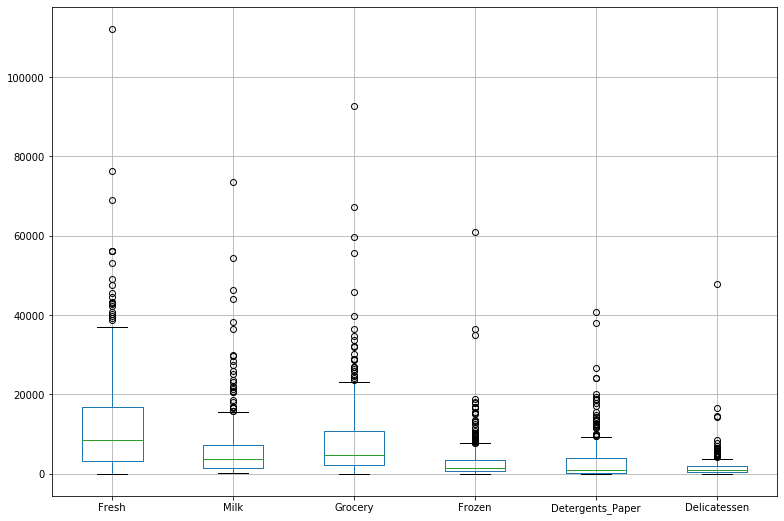

In [15]:
plt.figure(figsize = (13,9))
Q1.boxplot(column =['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen'])

In [16]:
Q2=pd.read_csv('Survey.csv')

In [42]:
C1=pd.crosstab(Q2['Gender'],Q2['Major'],margins = True)
C1

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [43]:
display(C1.loc[['Female'],:]/33)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,0.090909,0.090909,0.212121,0.121212,0.121212,0.090909,0.272727,0.0,1.0


In [44]:
display(C1.loc[['Male'],:]/29)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Male,0.137931,0.034483,0.137931,0.068966,0.206897,0.137931,0.172414,0.103448,1.0


In [46]:
C2=pd.crosstab(Q2['Gender'],Q2['Grad Intention'],margins = True)
C2

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [47]:
display(C2.loc[['Male'],:]/29)

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Male,0.103448,0.310345,0.586207,1.0


In [48]:
display(C2.loc[['Female'],:]/33)

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,0.272727,0.393939,0.333333,1.0


In [49]:
C3=pd.crosstab(Q2['Gender'],Q2['Employment'],margins = True)
C3

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


In [50]:
display(C3.loc[['Female'],:]/33)

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,0.090909,0.727273,0.181818,1.0


In [51]:
display(C3.loc[['Male'],:]/29)

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Male,0.241379,0.655172,0.103448,1.0


In [52]:
C4=pd.crosstab(Q2['Gender'],Q2['Computer'],margins = True)
C4

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


In [53]:
display(C4.loc[['Male'],:]/29)

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Male,0.103448,0.896552,0.0,1.0


In [54]:
display(C4.loc[['Female'],:]/33)

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,0.060606,0.878788,0.060606,1.0


In [7]:
#2.2.1
Q2.groupby(['Gender'])['Gender'].count()

Gender
Female    33
Male      29
Name: Gender, dtype: int64

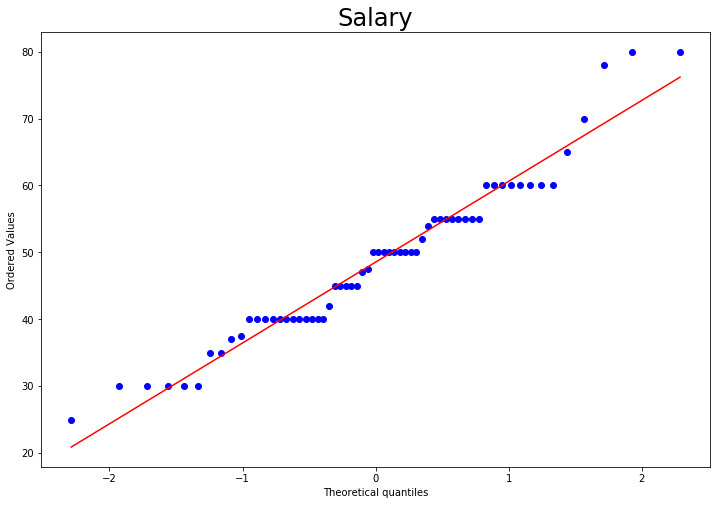

In [23]:
plt.figure(figsize = (12,8))
stats.probplot(Q2['Salary'],dist='norm',plot=pylab)
pylab.title('Salary',size=24)
pylab.show()

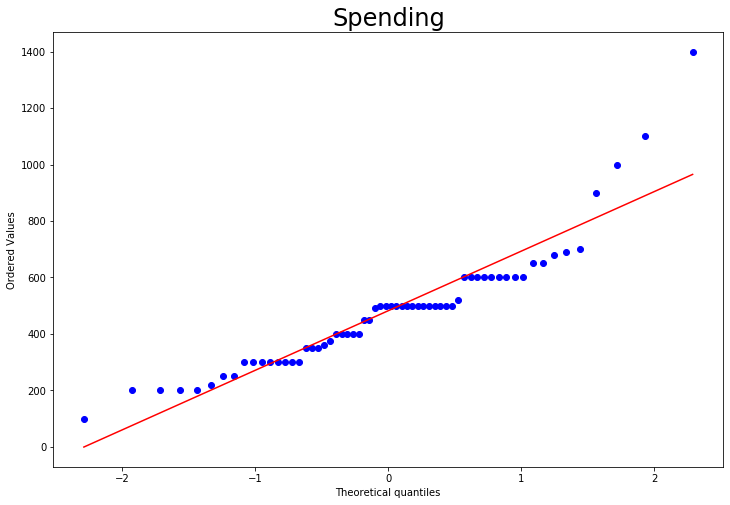

In [24]:
plt.figure(figsize = (12,8))
stats.probplot(Q2['Spending'],dist='norm',plot=pylab)
pylab.title('Spending',size=24)
pylab.show()

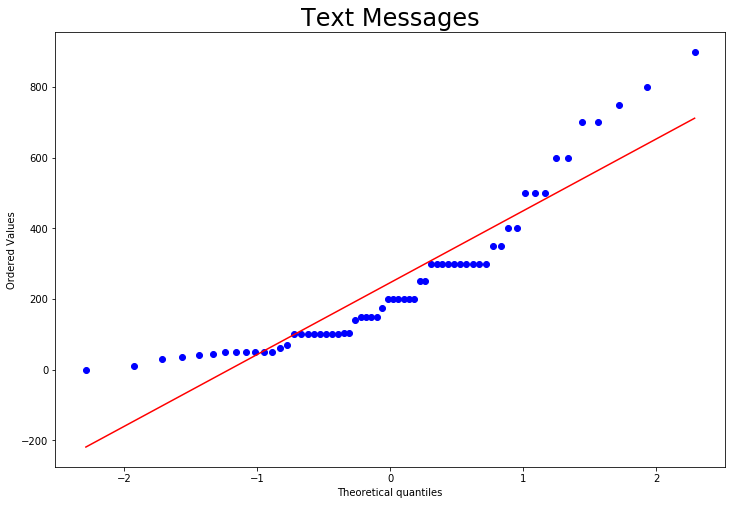

In [30]:
plt.figure(figsize = (12,8))
stats.probplot(Q2['Text Messages'],dist='norm',plot=pylab)
pylab.title('Text Messages',size=24)
pylab.show()

In [15]:
stats.shapiro(Q2['Salary'])

(0.9565856456756592, 0.028000956401228905)

In [25]:
stats.shapiro(Q2['Spending'])

(0.8777452111244202, 1.6854661225806922e-05)

In [31]:
stats.shapiro(Q2['Text Messages'])

(0.8594191074371338, 4.324040673964191e-06)

In [55]:
Q3=pd.read_csv('A+&+B+shingles.csv')

In [56]:
Q3['A'].mean()

0.3166666666666666

In [60]:
t_statistic, p_value = ttest_1samp(Q3['A'],0.35)
print(t_statistic,p_value)

-1.4735046253382782 0.14955266289815025


In [59]:
df=Q3['B'].dropna()
t_statistic, p_value = ttest_1samp(df,0.35)
print(t_statistic,p_value)

-3.1003313069986995 0.004180954800638363


In [10]:
t_statistic, p_value = ttest_ind(Q3['A'],df)
print(t_statistic, p_value)

1.289628271966112 0.2017496571835328


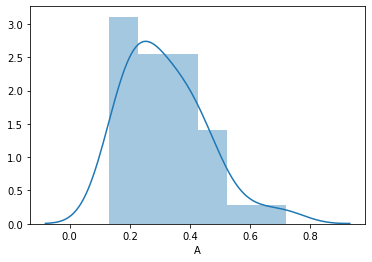

In [62]:
sns.distplot(Q3['A'])

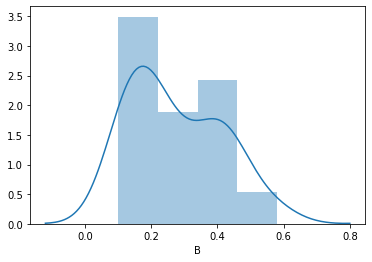

In [63]:
sns.distplot(df)

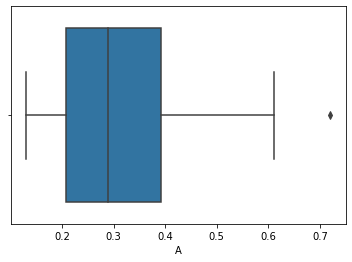

In [64]:
sns.boxplot(Q3['A'])

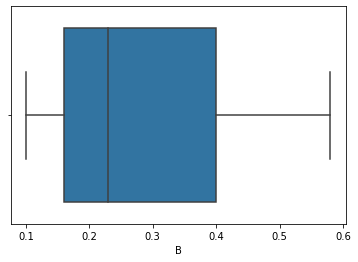

In [66]:
sns.boxplot(df)

In [68]:
Q3['A'].std()

0.13573082605973166

In [69]:
df.std()

0.13729647694185443

In [70]:
Q3['A'].var()

0.018422857142857133

In [71]:
df.var()

0.018850322580645163